In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'df_final_demo.txt'
df = pd.read_csv(url, delimiter = ",")
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [4]:
df["client_id"].is_unique

True

In [5]:
url2 = 'df_final_web_data_pt_1.txt'
df2 = pd.read_csv(url2, delimiter = ",")
df2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [6]:
process = df2["process_step"].value_counts()
process

process_step
start      108910
step_1      73432
step_2      61768
step_3      53628
confirm     45403
Name: count, dtype: int64

In [7]:
url3 = 'df_final_web_data_pt_2.txt'
df3 = pd.read_csv(url3, delimiter = ",")
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [8]:
url4 = 'df_final_experiment_clients.txt'
df4 = pd.read_csv(url4, delimiter = ",")
df4

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
var = df4["Variation"].value_counts()
var

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [10]:
num_nulls = df4['Variation'].isna().sum()
num_nulls

20109

In [11]:
df_client = df.merge(df4, on="client_id", how='left')
df_client

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [12]:
# Replace NaN on Variation
df_client = df_client.copy() 
df_client["Variation"].fillna("NA", inplace=True)
df_client_ab = df_client[df_client["Variation"] != "NA"]
df_client_ab

/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_48361/1943679894.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_client["Variation"].fillna("NA", inplace=True)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [13]:
num_null_rows = df_client_ab.isnull().all(axis=1).sum()
num_null_rows

0

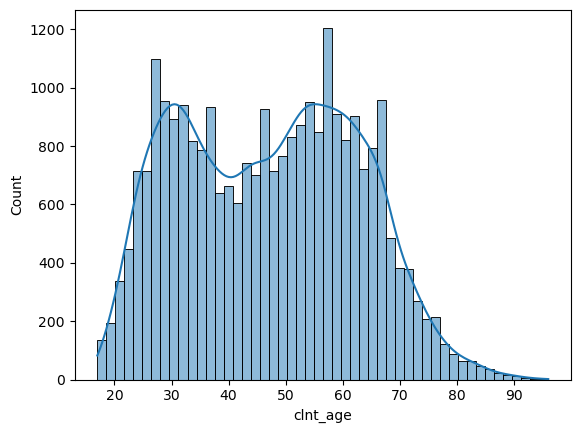

In [14]:
sns.histplot(df_client_ab[df_client_ab["Variation"] == "Test"], x='clnt_age', bins=50, kde=True)
plt.show()

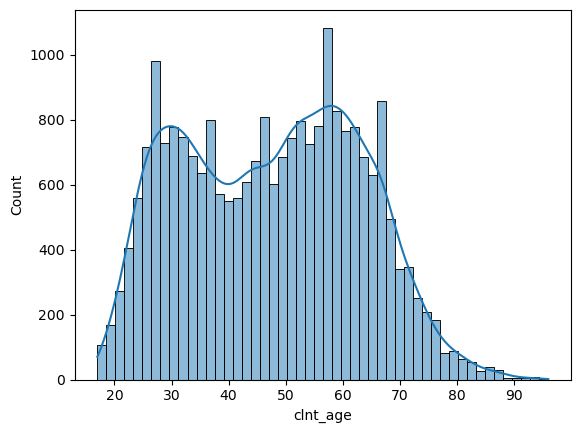

In [15]:
sns.histplot(df_client_ab[df_client_ab["Variation"] == "Control"], x='clnt_age', bins=50, kde=True)
plt.show()

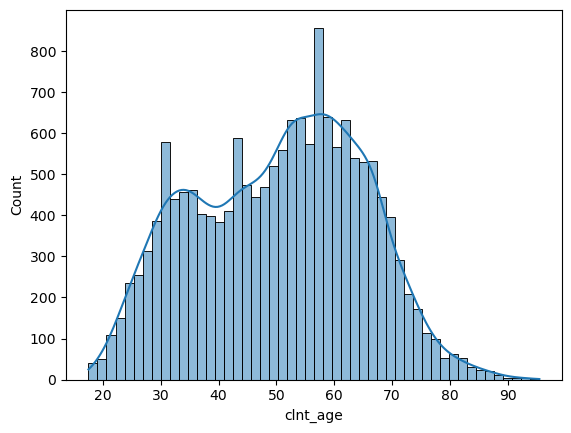

In [16]:
sns.histplot(df_client_ab[df_client_ab["gendr"] == "F"], x='clnt_age', bins=50, kde=True)
plt.show()

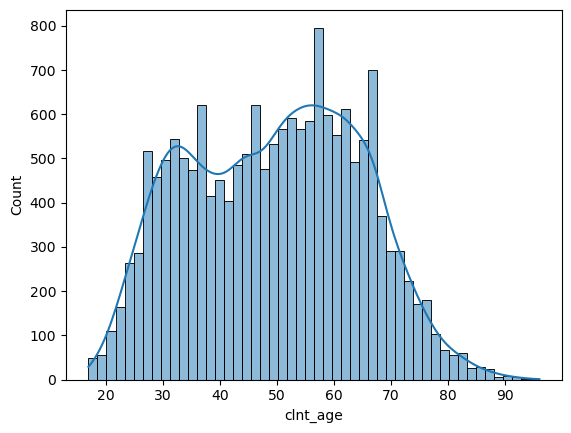

In [17]:
sns.histplot(df_client_ab[df_client_ab["gendr"] == "M"], x='clnt_age', bins=50, kde=True)
plt.show()

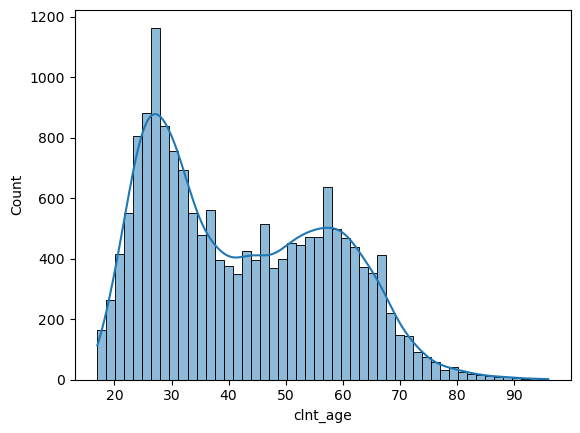

In [18]:
sns.histplot(df_client_ab[df_client_ab["gendr"] == "U"], x='clnt_age', bins=50, kde=True)
plt.show()

In [19]:
gender = df_client_ab["gendr"].value_counts()
gender

gendr
U    17280
M    16947
F    16259
X        2
Name: count, dtype: int64

/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_48361/2310510212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_ab['age_group'] = pd.cut(df_client_ab['clnt_age'], bins=age_bins, labels=age_labels, right=True)
/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_48361/2310510212.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_group = df_client_ab[df_client_ab['gendr'].isin(['M', 'F'])].groupby(['age_group', 'gendr']).size().unstack(fill_value=0)


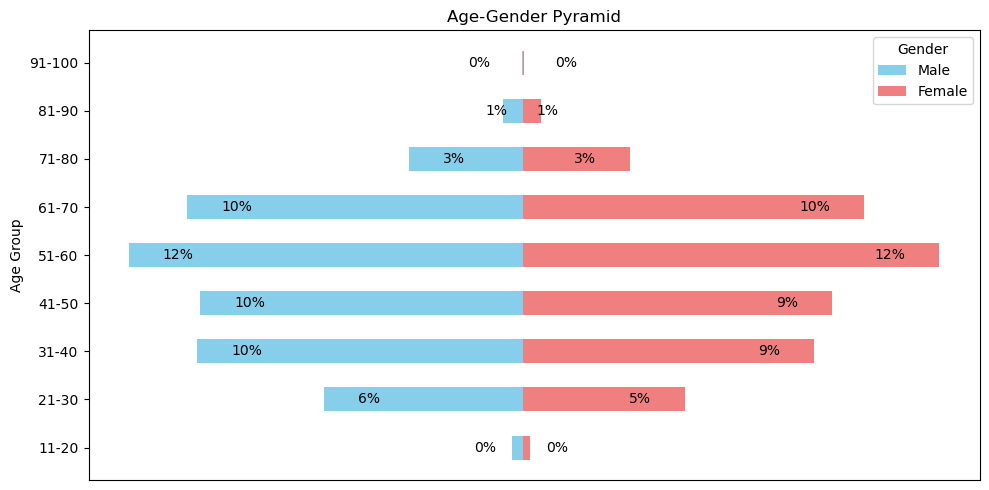

In [20]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df_client_ab['age_group'] = pd.cut(df_client_ab['clnt_age'], bins=age_bins, labels=age_labels, right=True)
gender_age_group = df_client_ab[df_client_ab['gendr'].isin(['M', 'F'])].groupby(['age_group', 'gendr']).size().unstack(fill_value=0)

gender_age_group['M'] = gender_age_group.get('M', 0)
gender_age_group['F'] = gender_age_group.get('F', 0)
total_mf = gender_age_group[['M', 'F']].sum().sum()

gender_age_group['M'] = (gender_age_group['M'] / total_mf) * 100
gender_age_group['F'] = (gender_age_group['F'] / total_mf) * 100

gender_age_group = gender_age_group[(gender_age_group['M'] > 0) | (gender_age_group['F'] > 0)]

plt.figure(figsize=(10, 5))


bars_male = plt.barh(gender_age_group.index, -gender_age_group['M'], color='skyblue', label='Male', height=0.5)
bars_female = plt.barh(gender_age_group.index, gender_age_group['F'], color='lightcoral', label='Female', height=0.5)

for bar in bars_male:
    if bar.get_width() < 0: 
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"{-bar.get_width():.0f}%", 
                 va='center', ha='left', fontsize=10, color='black')

for bar in bars_female:
    if bar.get_width() > 0: 
        plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.0f}%", 
                 va='center', ha='right', fontsize=10, color='black')

plt.title('Age-Gender Pyramid')
plt.ylabel('Age Group')
plt.xticks([])
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_48361/1072775256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_ab['age_group'] = pd.cut(df_client_ab['clnt_age'], bins=age_bins, labels=age_labels, right=True)
/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_48361/1072775256.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_group = df_client_ab.groupby(['age_group', 'gendr']).size().unstack(fill_value=0)


<Figure size 1000x500 with 0 Axes>

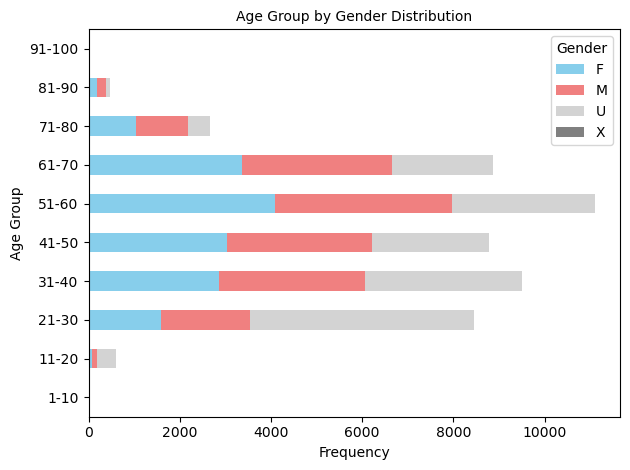

In [21]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df_client_ab['age_group'] = pd.cut(df_client_ab['clnt_age'], bins=age_bins, labels=age_labels, right=True)
gender_age_group = df_client_ab.groupby(['age_group', 'gendr']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 5))

gender_age_group.plot(kind='barh', stacked=True, color=['skyblue', 'lightcoral', 'lightgrey','grey'])

plt.title('Age Group by Gender Distribution',fontsize=10)
plt.xlabel('Frequency',fontsize=10)
plt.ylabel('Age Group',fontsize=10)
plt.legend(title='Gender', fontsize=10)

plt.tight_layout()
plt.show()

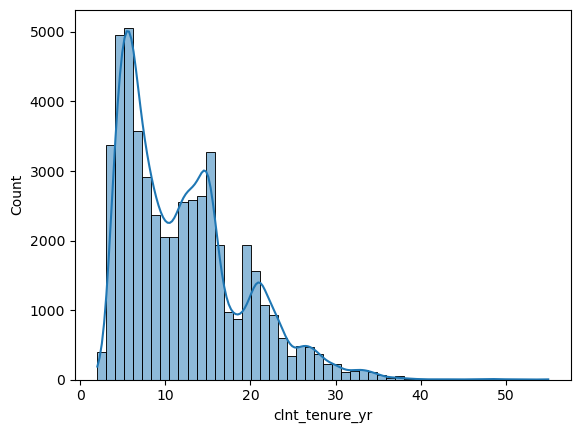

In [22]:
sns.histplot(df_client_ab, x='clnt_tenure_yr', bins=50, kde=True)
plt.show()

/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_48361/1759218790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gendr', y='clnt_tenure_yr', data=df_gender, palette={'M': 'skyblue', 'F': 'lightcoral','U':'grey'})


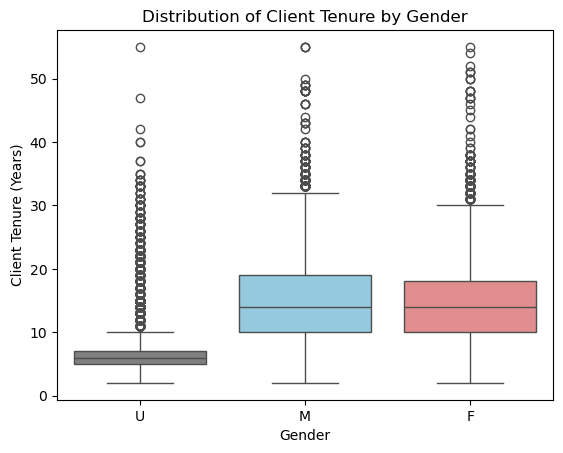

In [23]:
df_gender = df_client_ab[df_client_ab['gendr'].isin(['M','F','U'])]
sns.boxplot(x='gendr', y='clnt_tenure_yr', data=df_gender, palette={'M': 'skyblue', 'F': 'lightcoral','U':'grey'})

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Client Tenure (Years)')
plt.title('Distribution of Client Tenure by Gender')

# Show the plot
plt.show()

In [24]:

def boxplot_summary(data):
    Q1 = data.quantile(0.25)  # 25th percentile
    Q2 = data.median()        # Median (50th percentile)
    Q3 = data.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1             # Interquartile range
    lower_whisker = max(data[data >= (Q1 - 1.5 * IQR)].min(), data.min())  # Lower whisker
    upper_whisker = min(data[data <= (Q3 + 1.5 * IQR)].max(), data.max())  # Upper whisker
    outliers = data[(data < lower_whisker) | (data > upper_whisker)].values  # Outliers

    return pd.Series({
        'Min': data.min(),
        'Q1 (25%)': Q1,
        'Median (Q2)': Q2,
        'Q3 (75%)': Q3,
        'Max': data.max(),
        'Lower Whisker': lower_whisker,
        'Upper Whisker': upper_whisker
    })
summary_table = df_gender.groupby('gendr')['clnt_tenure_yr'].apply(boxplot_summary)

summary_table

gendr               
F      Min               2.0
       Q1 (25%)         10.0
       Median (Q2)      14.0
       Q3 (75%)         18.0
       Max              55.0
       Lower Whisker     2.0
       Upper Whisker    30.0
M      Min               2.0
       Q1 (25%)         10.0
       Median (Q2)      14.0
       Q3 (75%)         19.0
       Max              55.0
       Lower Whisker     2.0
       Upper Whisker    32.0
U      Min               2.0
       Q1 (25%)          5.0
       Median (Q2)       6.0
       Q3 (75%)          7.0
       Max              55.0
       Lower Whisker     2.0
       Upper Whisker    10.0
Name: clnt_tenure_yr, dtype: float64

In [25]:
# New Clients: Clients who joined within the last a year.
# Long-Standing Clients: Clients who joined more than a year ago.

In [26]:
df_client_ab['clnt_tenure_yr'].describe()

count    50488.000000
mean        12.031730
std          6.860282
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: clnt_tenure_yr, dtype: float64

In [27]:
age_tenure_summary = df_client_ab.groupby('age_group', observed=True)['clnt_tenure_yr'].agg(['mean', 'median', 'std'])

age_tenure_summary

,mean,median,std
age_group,,,
11-20,8.712397,5.0,6.618252
21-30,8.687204,7.0,5.483761
31-40,10.457137,10.0,5.044440
41-50,12.404643,12.0,6.044852
51-60,13.009643,12.0,7.011392
61-70,13.957262,13.0,7.747734
71-80,16.268018,15.0,8.255101
81-90,17.542735,17.0,9.033858
91-100,17.600000,15.0,8.527464


In [28]:
df_client_ab

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,61-70
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,51-60
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,31-40
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,41-50
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,31-40
...,...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test,61-70
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,61-70
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test,51-60
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test,61-70


In [29]:
df_pt = pd.concat([df2, df3], ignore_index=True)
df_pt

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [30]:
df_pt_merge = df_pt.merge(df4, on="client_id", how='left')
df_pt_merge

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN


In [31]:
df_pt_merge = df_pt_merge.copy() 
df_pt_merge["Variation"].fillna("NA", inplace=True)
df_pt_ab = df_pt_merge[df_pt_merge["Variation"] != "NA"]
df_pt_ab

/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_48361/458028609.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pt_merge["Variation"].fillna("NA", inplace=True)


,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
637487,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


visitor_id: A unique ID for each client-device combination.
visit_id: A unique ID for each web visit/session.

In [33]:
df_pt_ab[df_pt_ab["visit_id"] =="781255054_21935453173_531117"]

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,Test
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,Test
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,Test


In [34]:
df_pt_ab.groupby("client_id")["visit_id"].nunique()

client_id
555        1
647        1
934        1
1028       1
1104       2
          ..
9999150    1
9999400    1
9999626    1
9999729    3
9999832    1
Name: visit_id, Length: 50500, dtype: int64

In [35]:
df_pt_ab["date_time"] = pd.to_datetime(df_pt_ab["date_time"])

/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_48361/822789462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pt_ab["date_time"] = pd.to_datetime(df_pt_ab["date_time"])


In [36]:
df_pt_ab.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
Variation               object
dtype: object

In [37]:
df_pt_ab = df_pt_ab.sort_values(["visit_id", "date_time"]).reset_index(drop=True)

In [38]:
df_pt_ab

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test
1,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test
2,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test
3,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test
4,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test
...,...,...,...,...,...,...
321304,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test
321305,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test
321306,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test
321307,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test


In [39]:
df_pt_ab[df_pt_ab["visit_id"] =="100012776_37918976071_457913"]

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test
1,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test


In [40]:
df_pt_ab[df_pt_ab["client_id"] ==3561384]

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test
1,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test
95201,3561384,451664975_1722933822,368621065_55513134501_466827,start,2017-04-25 13:18:45,Test
95202,3561384,451664975_1722933822,368621065_55513134501_466827,step_1,2017-04-25 13:18:59,Test
95203,3561384,451664975_1722933822,368621065_55513134501_466827,step_2,2017-04-25 13:19:20,Test
95204,3561384,451664975_1722933822,368621065_55513134501_466827,step_3,2017-04-25 13:19:42,Test
95205,3561384,451664975_1722933822,368621065_55513134501_466827,confirm,2017-04-25 13:22:14,Test


In [41]:
# Mapping Process Steps to Numeric Values
step_order = {"start": 0, "step_1": 1, "step_2": 2, "step_3": 3, "confirm": 4}
df_pt_ab["step_num"] = df_pt_ab["process_step"].map(step_order)
df_pt_ab

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_num
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4
1,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4
2,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,0
3,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,1
4,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,2
...,...,...,...,...,...,...,...
321304,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,0
321305,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,1
321306,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,2
321307,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,1


In [42]:
step_map = df_pt_ab[["process_step", "step_num"]].drop_duplicates()
step_map

,process_step,step_num
0,confirm,4
2,start,0
3,step_1,1
4,step_2,2
11,step_3,3


Identifying Backward Movements (Errors)

In [44]:
# Filter Only Sessions That Contain "start"
# Finds all visit_ids where process_step == "start"
# Filters df_pt_ab to keep only these valid visit_ids
valid_sessions = df_pt_ab[df_pt_ab["process_step"] == "start"]["visit_id"].unique()
df_pt_filtered = df_pt_ab[df_pt_ab["visit_id"].isin(valid_sessions)]
df_pt_filtered = df_pt_filtered.sort_values(["visit_id", "date_time"]).reset_index(drop=True)

In [45]:
# Groups by visit_id
# Calculates diff() → Finds changes between steps
# If the difference is negative, it means a step moved backward
df_pt_filtered["step_regression"] = df_pt_filtered.groupby("visit_id")["step_num"].diff(periods=-1) > 0

In [46]:
df_pt_filtered.head(10)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_num,step_regression
0,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,0,False
1,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,1,False
2,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,2,True
3,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,Test,1,False
4,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41,Test,1,True
5,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45,Test,0,False
6,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59,Test,0,False
7,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04,Test,1,False
8,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:22:08,Test,2,False
9,7338123,612065484_94198474375,100019538_17884295066_43909,step_3,2017-04-09 16:24:01,Test,3,False


In [47]:
df_pt_filtered[df_pt_filtered["visit_id"] =="999988789_76411676596_272843"]

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_num,step_regression
312184,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,0,False
312185,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,1,False
312186,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,2,True
312187,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,1,True
312188,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:51:09,Test,0,False


In [48]:
# Count Regression Occurrences Per Step
# Counts unique visit_ids where regressions happened per process_step
regression_counts = (
    df_pt_filtered[df_pt_filtered["step_regression"]]
    .groupby(["process_step", "Variation"])["visit_id"]
    .nunique()
)
regression_counts

process_step  Variation
confirm       Control       786
              Test          420
step_1        Control      2188
              Test         5390
step_2        Control      1759
              Test         3698
step_3        Control      3202
              Test         3716
Name: visit_id, dtype: int64

In [49]:
total_unique_visits = (
    df_pt_filtered.groupby(["process_step", "Variation"])["visit_id"]
    .nunique()
)
total_unique_visits

process_step  Variation
confirm       Control      14903
              Test         17909
start         Control      30910
              Test         33157
step_1        Control      23281
              Test         28023
step_2        Control      19790
              Test         24137
step_3        Control      17839
              Test         21638
Name: visit_id, dtype: int64

In [50]:
error_rate_per_step = ((regression_counts / total_unique_visits)*100).reset_index()
error_rate_per_step.rename(columns={"visit_id": "error_rate"}, inplace=True)
error_rate_per_step

,process_step,Variation,error_rate
0,confirm,Control,5.274106
1,confirm,Test,2.345190
2,start,Control,NaN
3,start,Test,NaN
4,step_1,Control,9.398222
5,step_1,Test,19.234200
6,step_2,Control,8.888327
7,step_2,Test,15.320877
8,step_3,Control,17.949437
9,step_3,Test,17.173491


Error Rate per step = (Sessions with at least one regression / Total sessions that reached the step) ×100%

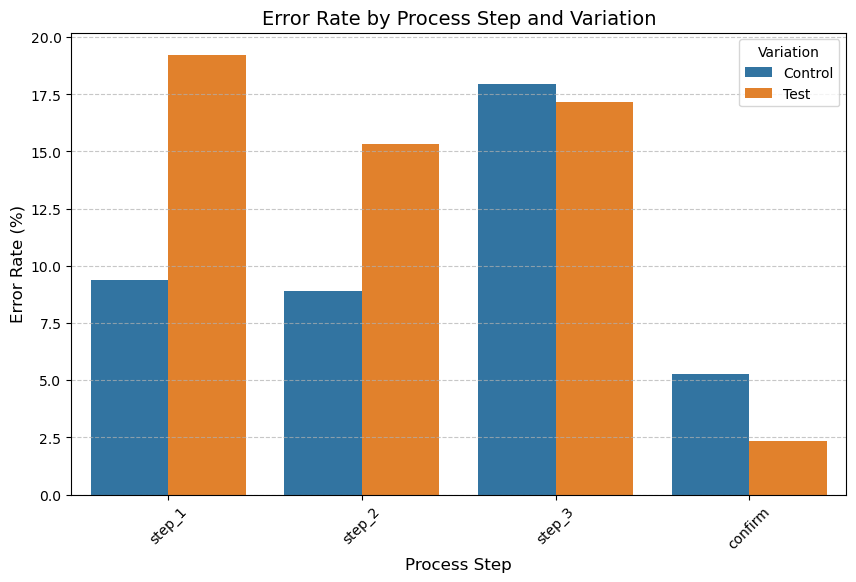

In [52]:
# Define the order of the process steps
process_step_order = ['step_1', 'step_2', 'step_3', 'confirm']

error_rate_per_step_filtered = error_rate_per_step[error_rate_per_step['process_step'] != 'start']

plt.figure(figsize=(10, 6))
sns.barplot(x="process_step", y="error_rate", hue="Variation", data=error_rate_per_step_filtered, order=process_step_order)

# Formatting
plt.title("Error Rate by Process Step and Variation", fontsize=14)
plt.xlabel("Process Step", fontsize=12)
plt.ylabel("Error Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Variation")
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()


In [53]:
df_pt_filtered[df_pt_filtered["visit_id"] == "108185369_27453506388_542429"]

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_num,step_regression
2855,5873674,998221412_70553317754,108185369_27453506388_542429,start,2017-04-06 15:25:05,Control,0,False
2856,5873674,998221412_70553317754,108185369_27453506388_542429,start,2017-04-06 15:34:01,Control,0,False
2857,5873674,998221412_70553317754,108185369_27453506388_542429,step_1,2017-04-06 15:34:49,Control,1,False
2858,5873674,998221412_70553317754,108185369_27453506388_542429,step_2,2017-04-06 15:35:06,Control,2,False
2859,5873674,998221412_70553317754,108185369_27453506388_542429,step_3,2017-04-06 15:35:42,Control,3,True
2860,5873674,998221412_70553317754,108185369_27453506388_542429,step_1,2017-04-06 15:37:34,Control,1,False
2861,5873674,998221412_70553317754,108185369_27453506388_542429,step_2,2017-04-06 15:38:02,Control,2,False
2862,5873674,998221412_70553317754,108185369_27453506388_542429,step_3,2017-04-06 15:38:24,Control,3,False
2863,5873674,998221412_70553317754,108185369_27453506388_542429,step_3,2017-04-06 16:10:13,Control,3,False
2864,5873674,998221412_70553317754,108185369_27453506388_542429,confirm,2017-04-06 16:10:13,Control,4,True


In [54]:
# Count total errors per Variation group
error_counts = df_pt_filtered.groupby("Variation")["step_regression"].sum()

# Count total steps taken per Variation group
total_steps = df_pt_filtered.groupby("Variation")["process_step"].count()

# Calculate error rate for each group
error_rate = (error_counts / total_steps).reset_index()
error_rate.columns = ["Variation", "Error Rate"]

# Convert to percentage
error_rate["Error Rate"] = error_rate["Error Rate"] * 100

error_rate

,Variation,Error Rate
0,Control,6.813126
1,Test,9.490932


In [55]:
error_counts

Variation
Control     9586
Test       16276
Name: step_regression, dtype: int64

In [109]:
total_steps

Variation
Control    140699
Test       171490
Name: process_step, dtype: int64

In [128]:
# Two Proportion Hypothesis Test
# H0: error rate of Control group = error rate of Test group
# H1: error rate of  Control group > error rate of Test group

In [137]:
x1 = error_counts["Control"] # error rate of control
x2 = error_counts["Test"] # error rate of test
n1 = total_steps["Control"] # ttl steps of control
n2 = total_steps["Test"] # ttl steps of test
p1 = error_counts["Control"]/total_steps["Control"]
p2 = error_counts["Test"]/total_steps["Test"]
q1 = 1 - (error_counts["Control"]/total_steps["Control"])
q2 = 1 - (error_counts["Test"]/total_steps["Test"])
alpha = 0.05

In [139]:
# pooled proportion -> combines the two sample proportions into a single value
p = (error_counts["Control"] + error_counts["Test"]) / (total_steps["Control"] + total_steps["Test"])
p

0.08284084320715976

In [141]:
# Pooled complement
q = 1 - p
q

0.9171591567928402

In [145]:
# Calculate the Test Statistic
import math
z = (p1 - p2) / math.sqrt((p * q * ((1 / n1) + (1 / n2))))
z

-27.007892345473312

In [ ]:
# z-score
